【温度】
　帰無仮説：温度が製造量に変化を与えない
　対立仮設：温度が製造量に変化を与える

【反応時間】
　帰無仮説：反応時間が製造量に変化を与えない
　対立仮設：反応時間が製造量に変化を与える

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# Pandasでデータを読み込み、その内容を何件か確認
data1 = pd.read_csv('reagents_data.csv')

In [3]:
data1.shape

(40, 3)

In [4]:
data1.head()

,Temp,Time,Volume
0,100,10,21.624345
1,100,10,19.388244
2,100,10,19.471828
3,100,10,18.927031
4,100,10,20.865408


<Axes: xlabel='Time', ylabel='Volume'>

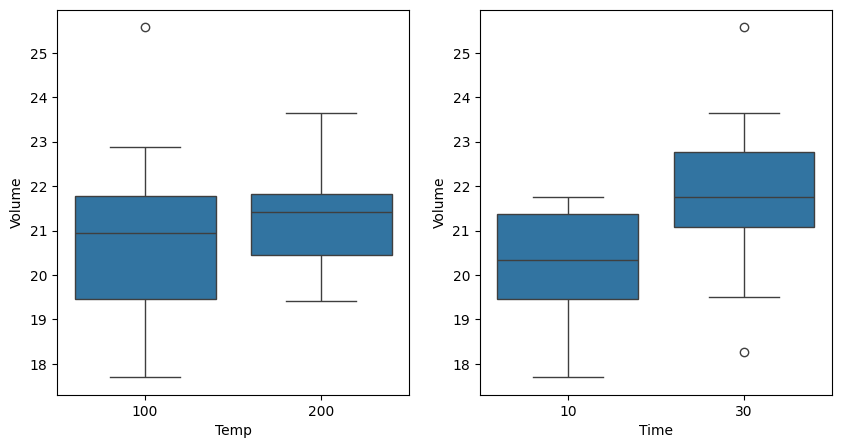

In [5]:
# 横軸に温度・反応時間、縦軸に製造量をとった箱ひげ図
f, axes = plt.subplots(1, 2, figsize=(10,5))

sns.boxplot(x='Temp', y='Volume', data=data1, ax=axes[0])
sns.boxplot(x='Time', y='Volume', data=data1, ax=axes[1])

In [6]:
# 全データの製造量の平均値を計算してください
mu_all = np.mean(data1['Volume'])
mu_all

np.float64(21.064619498696484)

In [7]:
# 温度条件：製造量の平均値
me_Temp_100 = np.mean(data1.query('Temp == 100')['Volume'])
me_Temp_200 = np.mean(data1.query('Temp == 200')['Volume'])
print(me_Temp_100, me_Temp_200)

# 反応時間：製造量の平均値
me_Time_10 = np.mean(data1.query('Time == 10')['Volume'])
me_Time_30 = np.mean(data1.query('Time == 30')['Volume'])
print(me_Time_10, me_Time_30)

20.81095130951942 21.318287687873553
20.32047783804376 21.80876115934921


In [8]:
# 全体の平方和
squares_all = np.sum((data1['Volume'] - mu_all) ** 2)
squares_all

np.float64(90.77291728168147)

In [29]:
# 温度の平方和
mu_n_Temp = [me_Temp_100] * data1.query('Temp == 100').shape[0] + [me_Temp_200] * data1.query('Temp == 200').shape[0] 

temp_means_expanded = np.array(mu_n_Temp)
squares_Temp = np.sum((temp_means_expanded - mu_all)**2)
squares_Temp


np.float64(2.5739020080148745)

In [30]:
# 温度の自由度
df_Temp = data1['Temp'].nunique() - 1
df_Temp

1

In [31]:
# 温度の分散
variance_Temp = squares_Temp / df_Temp
variance_Temp

np.float64(2.5739020080148745)

In [ ]:
# 反応時間の平方和
mu_n_Time = [me_Time_10] * data1.query('Time == 10').shape[0] + [me_Time_30] * data1.query('Time == 30').shape[0] 

temp_means_expanded = np.array(mu_n_Time)
squares_Time = np.sum((temp_means_expanded - mu_all)**2)
squares_Time

np.float64(22.14987244475978)

In [17]:
# 反応時間の自由度
df_Time = data1['Time'].nunique() - 1
df_Time

1

In [35]:
# 反応時間の分散
variance_Time = squares_Time / df_Time
variance_Time

np.float64(22.14987244475978)

In [23]:
# 誤差の平方和
squares_resid = squares_all - squares_Temp - squares_Time
squares_resid

np.float64(66.04914282890682)

In [24]:
# 誤差の自由度
df_resid = len(data1) - 1 - (df_Temp + df_Time)
df_resid

37

In [32]:
# 誤差の分散
variance_resid = squares_resid / df_resid
variance_resid


np.float64(1.785111968348833)

In [33]:
# 温度のF比
f_ratio_Temp = variance_Temp / variance_resid
f_ratio_Temp

np.float64(1.4418714644525323)

In [36]:
# 反応時間のF比
f_ratio_Time = variance_Time / variance_resid
f_ratio_Time

np.float64(12.408113797616654)

In [37]:
# 温度のp値
1-sp.stats.f.cdf(x=f_ratio_Temp, dfn=df_Temp, dfd=df_resid)

np.float64(0.23746784737213267)

In [38]:
# 反応時間のp値
1-sp.stats.f.cdf(x=f_ratio_Time, dfn=df_Time, dfd=df_resid)

np.float64(0.0011555176940120093)

In [10]:
# statsmodelsで二元分散分析を実施
anova_model_3 = smf.ols('Volume ~ Temp + Time', data=data1).fit()
sm.stats.anova_lm(anova_model_3, typ=2)

,sum_sq,df,F,PR(>F)
Temp,2.573902,1.0,1.441871,0.237468
Time,22.149872,1.0,12.408114,0.001156
Residual,66.049143,37.0,NaN,NaN


有意水準を5%とするので
温度のp値：23.7468% 帰無仮説を棄却できない
反応時間のp値：0.156% 帰無仮説を棄却できる

